# IMPORTNG LIBRARIES

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


   # Spliting data to features and target

In [2]:
df = pd.read_csv('archivetemptrain.csv')
df = df.drop_duplicates('review_description')
x_trainingset = df.iloc[:,3].values
y_trainingset = df.iloc[:,-1].values

# visualization

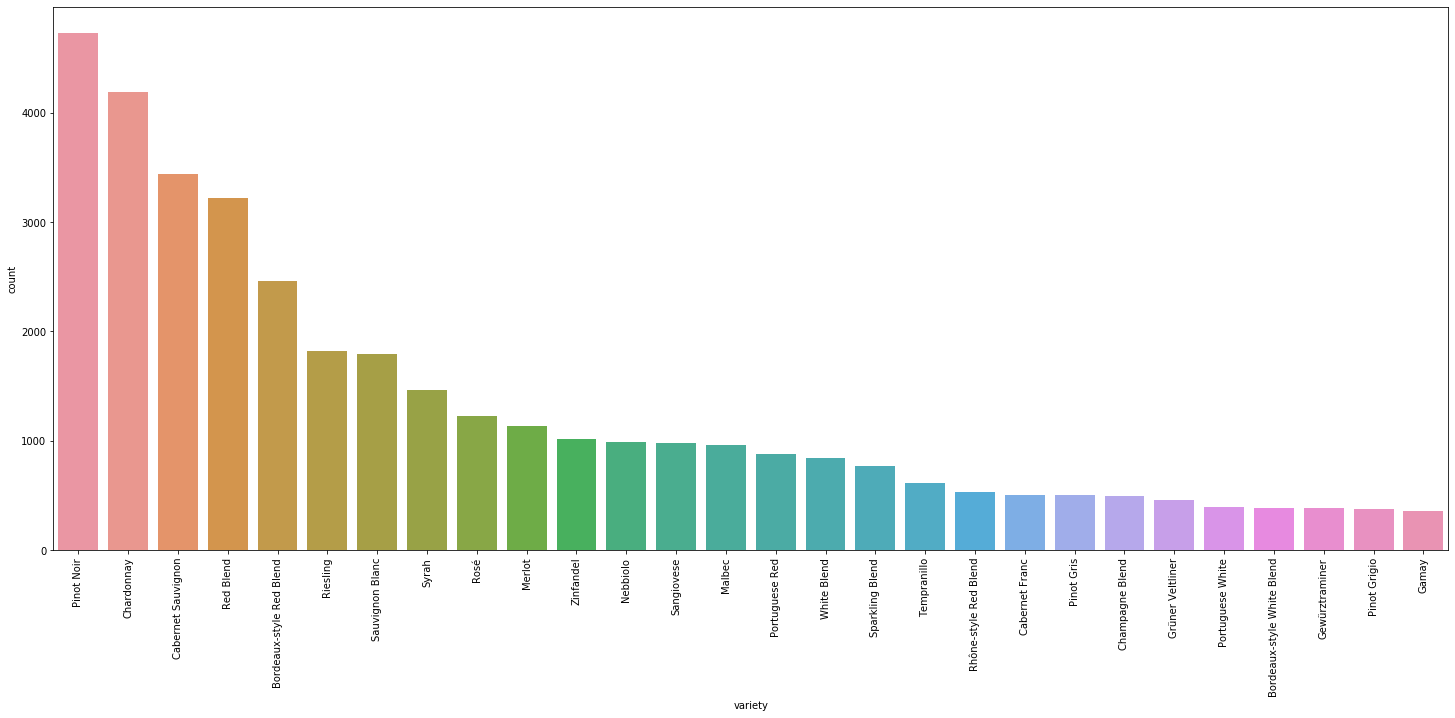

In [3]:
variety_df = df.groupby('variety').filter(lambda x: len(x) > 200)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

# Preprocessing the features

In [4]:
corpus_train = []
ps = PorterStemmer()
for i in x_trainingset:
    review_description = re.sub('[^a-zA-Z]', ' ', i)
    review_description = review_description.lower()
    review_description = review_description.split(' ')
    review_description = [ps.stem(word) for word in review_description if not word in set(stopwords.words('english'))]
    review_description = ' '.join(review_description)
    corpus_train.append(review_description)

# Converting to matrix by TF-IDF

In [5]:
cv = TfidfVectorizer(min_df=1,stop_words='english')
x_train = cv.fit_transform(corpus_train)
x_train = x_train[:].toarray()

In [6]:
y_train = y_trainingset.reshape(-1,1)
ct = ColumnTransformer(transformers=[('oh', OneHotEncoder(), [0])])
y_train = ct.fit_transform(y_train)
y_train = y_train[:].toarray()

#  Training part of training_set by Neural Networks

In [7]:
classifier = Sequential()
classifier.add(Dense(output_dim = 128,init='uniform',activation='relu',input_dim = 13543))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 64,init='uniform',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 28,init='uniform',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13543, units=128, kernel_initializer="uniform")`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=28, kernel_initializer="uniform")`
  


In [8]:
classifier.fit(x_train[0:30000,:],y_train[0:30000,:],batch_size=100,nb_epoch=10)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
30000/30000 [==============================] - 223s 7ms/step - loss: 2.6488 - accuracy: 0.2231
Epoch 2/10
30000/30000 [==============================] - 141s 5ms/step - loss: 1.8652 - accuracy: 0.4193
Epoch 3/10
30000/30000 [==============================] - 121s 4ms/step - loss: 1.4657 - accuracy: 0.5392
Epoch 4/10
30000/30000 [==============================] - 80s 3ms/step - loss: 1.2010 - accuracy: 0.6213
Epoch 5/10
30000/30000 [==============================] - 107s 4ms/step - loss: 1.0233 - accuracy: 0.6759
Epoch 6/10
30000/30000 [==============================] - 94s 3ms/step - loss: 0.8851 - accuracy: 0.7227
Epoch 7/10
30000/30000 [==============================] - 72s 2ms/step - loss: 0.7761 - accuracy: 0.7580
Epoch 8/10
  200/30000 [..............................] - ETA: 14:11 - loss: 0.6640 - accuracy: 0.8000

C:\Users\user\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.181934). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


30000/30000 [==============================] - 125s 4ms/step - loss: 0.6828 - accuracy: 0.7887
Epoch 9/10
30000/30000 [==============================] - 150s 5ms/step - loss: 0.5988 - accuracy: 0.8185
Epoch 10/10
30000/30000 [==============================] - 87s 3ms/step - loss: 0.5297 - accuracy: 0.8406


# Just checking model accuracy by testing remained dataset in training_set

In [9]:
y_trail = classifier.predict(x_train[30000:,:])

In [10]:
y_trail_prediction = []
for i in y_trail:
    for j in range(len(i)):
        if i[j]==max(i):
            y_trail_prediction.append(j)

In [11]:
y_trail_check = df.iloc[30000:,-1].values
labelencoder = LabelEncoder()
y_trail_check[:] = labelencoder.fit_transform(y_trail_check[:])

In [12]:
total = 0
correct = 0
for i in range(len(y_trail_check)):
    if y_trail_check[i]==y_trail_prediction[i]:
        correct+=1
    total+=1
trail_accuracy = (correct/total)

In [13]:
trail_accuracy

0.6331080109305336

# TESTING REAL TESTING_SET

In [14]:
testing_set = pd.read_csv('archivetemptest.csv')
x_testing = testing_set.iloc[:,3].values

In [15]:
corpus_test = []
for i in x_testing:
    review_description = re.sub('[^a-zA-Z]', ' ', i)
    review_description = review_description.lower()
    review_description = review_description.split(' ')
    review_description = [ps.stem(word) for word in review_description if not word in set(stopwords.words('english'))]
    review_description = ' '.join(review_description)
    corpus_test.append(review_description)

In [16]:
x_test = cv.transform(corpus_test)
x_test = x_test[:].toarray()

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
y_prediction = []
for i in y_pred:
    for j in range(len(i)):
        if i[j]==max(i):
            y_prediction.append(j)

In [19]:
y_pred_label = labelencoder.inverse_transform(y_prediction)

# Y_PRED_LABEL is the winery variety of testdata

In [20]:
y_pred_label

array(['Pinot Gris', 'Malbec', 'Chardonnay', ..., 'Cabernet Sauvignon',
       'Tempranillo', 'Cabernet Sauvignon'], dtype=object)